![Texto alternativo](https://laserud.co/wp-content/uploads/2020/05/cropped-LOGOLASER-1.jpg "Grupo LASER")

# Algoritmo de Naive Bayes

Es un modelo muy popular de clasificación muy popular para analizar conjuntos de datos de los que poco o nada se sabe asumiendo que cada caracteristica (registro de la base de datos) es independiente, y no requiere tantos recursos a nivel computacional ni un conjunto muy grande de datos para el entrenamiento ya que se apoya en el calculo de probabilidades y probabilidad condicional.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo de Naive Bayes; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">aquí</a>

In [1]:
!pip install sklearn

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Ahora vamos a agregar la librería que contiene el modelo de Naive Bayes y la librería datetime, puesto que vamos a crear una función **gaussian_naive_bayes_algorithm** que recibe como parametro las variables **train_data, x_variables, y_variable** que hacen referencia el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [2]:
from sklearn.naive_bayes import GaussianNB

import datetime

def gaussian_naive_bayes_algorithm(train_data, x_variables, y_variable):
    x_train = train_data[x_variables]
    y_train = train_data[[y_variable]]
    
    start_time = datetime.datetime.now()
    
    model = GaussianNB()
    model.fit(x_train,y_train.values.ravel())
    
    elapsed_time = datetime.datetime.now() - start_time
    
    return model, (elapsed_time.total_seconds() * 1000)


En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/LASER-UD/machinelearning/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/LASER-UD/machinelearning/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [3]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
data_stream = requests.get(url).content

import io

headers = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


animal_name  hair  feathers  eggs  milk  airbone  aquatic  predator  \
0      aardvark     1         0     0     1        0        0         1   
1      antelope     1         0     0     1        0        0         0   
2          bass     0         0     1     0        0        1         1   
3          bear     1         0     0     1        0        0         1   
4          boar     1         0     0     1        0        0         1   
..          ...   ...       ...   ...   ...      ...      ...       ...   
96      wallaby     1         0     0     1        0        0         0   
97         wasp     1         0     1     0        1        0         0   
98         wolf     1         0     0     1        0        0         1   
99         worm     0         0     1     0        0        0         0   
100        wren     0         1     1     0        1        0         0   

     toother  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [4]:
x_columns =  ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
target_column_name = 'type'
y_columns = [target_column_name]
target_classes_name = ['1', '2', '3', '4', '5', '6', '7']

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación del modelo de naive bayes con el siguiente fragmento de código:

In [5]:
# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [6]:
train_data.describe()

hair   feathers       eggs       milk    airbone    aquatic  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.442623   0.180328   0.573770   0.442623   0.213115   0.360656   
std     0.500819   0.387651   0.498632   0.500819   0.412907   0.484176   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   1.000000   0.000000   0.000000   0.000000   
75%     1.000000   0.000000   1.000000   1.000000   0.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

        predator    toother   backbone   breathes   venomous       fins  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.590164   0.655738   0.852459   0.786885   0.049180   0.163934   
std     0.495885   0.479070   0.357588   0.412907   0.218039   0.373288   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   1.000000   1.000000   0.000000   0.000000   
50%     1.000000   1.000000   1.000000   1.000000   0.000000   0.000000   
75%     1.000000   1.000000   1.000000   1.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

            legs       tail   domestic    catsize       type  
count  61.000000  61.000000  61.000000  61.000000  61.000000  
mean    2.737705   0.754098   0.131148   0.459016   2.737705  
std     1.913998   0.434194   0.340363   0.502453   2.112673  
min     0.000000   0.000000   0.000000   0.000000   1.000000  
25%     2.000000   1.000000   0.000000   0.000000   1.000000  
50%     4.000000   1.000000   0.000000   0.000000   2.000000  
75%     4.000000   1.000000   0.000000   1.000000   4.000000  
max     8.000000   1.000000   1.000000   1.000000   7.000000

In [7]:
train_data.corr(method='pearson')

hair  feathers      eggs      milk   airbone   aquatic  \
hair      1.000000 -0.417978 -0.833706  0.867102 -0.141374 -0.463102   
feathers -0.417978  1.000000  0.404263 -0.417978  0.693031 -0.263484   
eggs     -0.833706  0.404263  1.000000 -0.967187  0.286643  0.371201   
milk      0.867102 -0.417978 -0.967187  1.000000 -0.302567 -0.325636   
airbone  -0.141374  0.693031  0.286643 -0.302567  1.000000 -0.390868   
aquatic  -0.463102 -0.263484  0.371201 -0.325636 -0.390868  1.000000   
predator -0.196929 -0.216043  0.090609 -0.062709 -0.380304  0.417639   
toother   0.437291 -0.647339 -0.624500  0.576222 -0.549732  0.041227   
backbone  0.184604  0.195133 -0.358569  0.370734 -0.009252 -0.168856   
breathes  0.463760  0.244097 -0.448543  0.463760  0.270833 -0.609535   
venomous -0.202670 -0.106674  0.196020 -0.202670 -0.118358  0.144934   
fins     -0.305450 -0.207695  0.113028 -0.127149 -0.230444  0.589571   
legs      0.488263 -0.182281 -0.258801  0.279618 -0.033535 -0.165990   
tail      0.125648  0.267842 -0.261231  0.278938  0.111252 -0.205347   
domestic  0.240429  0.070407 -0.254363  0.240429  0.034994 -0.291801   
catsize   0.503803 -0.089776 -0.603071  0.636268 -0.318704 -0.143757   
type     -0.581533 -0.165140  0.714802 -0.739053 -0.068593  0.485064   

          predator   toother  backbone  breathes  venomous      fins  \
hair     -0.196929  0.437291  0.184604  0.463760 -0.202670 -0.305450   
feathers -0.216043 -0.647339  0.195133  0.244097 -0.106674 -0.207695   
eggs      0.090609 -0.624500 -0.358569 -0.448543  0.196020  0.113028   
milk     -0.062709  0.576222  0.370734  0.463760 -0.202670 -0.127149   
airbone  -0.380304 -0.549732 -0.009252  0.270833 -0.118358 -0.230444   
aquatic   0.417639  0.041227 -0.168856 -0.609535  0.144934  0.589571   
predator  1.000000  0.097759 -0.064715 -0.270883  0.189525  0.188931   
toother   0.097759  1.000000  0.574169  0.128455  0.005231  0.320844   
backbone -0.064715  0.574169  1.000000  0.460770 -0.119147  0.184219   
breathes -0.270883  0.128455  0.460770  1.000000 -0.066766 -0.526477   
venomous  0.189525  0.005231 -0.119147 -0.066766  1.000000 -0.100707   
fins      0.188931  0.320844  0.184219 -0.526477 -0.100707  1.000000   
legs     -0.062468 -0.063766 -0.252297  0.265514 -0.168258 -0.591976   
tail     -0.088828  0.307363  0.728539  0.260603 -0.222224  0.252861   
domestic -0.268722  0.077079  0.161632  0.202189 -0.088360 -0.172037   
catsize   0.165585  0.251987  0.290452  0.318704 -0.209493 -0.052442   
type      0.166129 -0.436513 -0.802169 -0.657427  0.245557  0.076566   

              legs      tail  domestic   catsize      type  
hair      0.488263  0.125648  0.240429  0.503803 -0.581533  
feathers -0.182281  0.267842  0.070407 -0.089776 -0.165140  
eggs     -0.258801 -0.261231 -0.254363 -0.603071  0.714802  
milk      0.279618  0.278938  0.240429  0.636268 -0.739053  
airbone  -0.033535  0.111252  0.034994 -0.318704 -0.068593  
aquatic  -0.165990 -0.205347 -0.291801 -0.143757  0.485064  
predator -0.062468 -0.088828 -0.268722  0.165585  0.166129  
toother  -0.063766  0.307363  0.077079  0.251987 -0.436513  
backbone -0.252297  0.728539  0.161632  0.290452 -0.802169  
breathes  0.265514  0.260603  0.202189  0.318704 -0.657427  
venomous -0.168258 -0.222224 -0.088360 -0.209493  0.245557  
fins     -0.591976  0.252861 -0.172037 -0.052442  0.076566  
legs      1.000000 -0.319565  0.104852  0.265924  0.007433  
tail     -0.319565  1.000000 -0.003698  0.296816 -0.689233  
domestic  0.104852 -0.003698  1.000000  0.129409 -0.275855  
catsize   0.265924  0.296816  0.129409  1.000000 -0.559823  
type      0.007433 -0.689233 -0.275855 -0.559823  1.000000

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

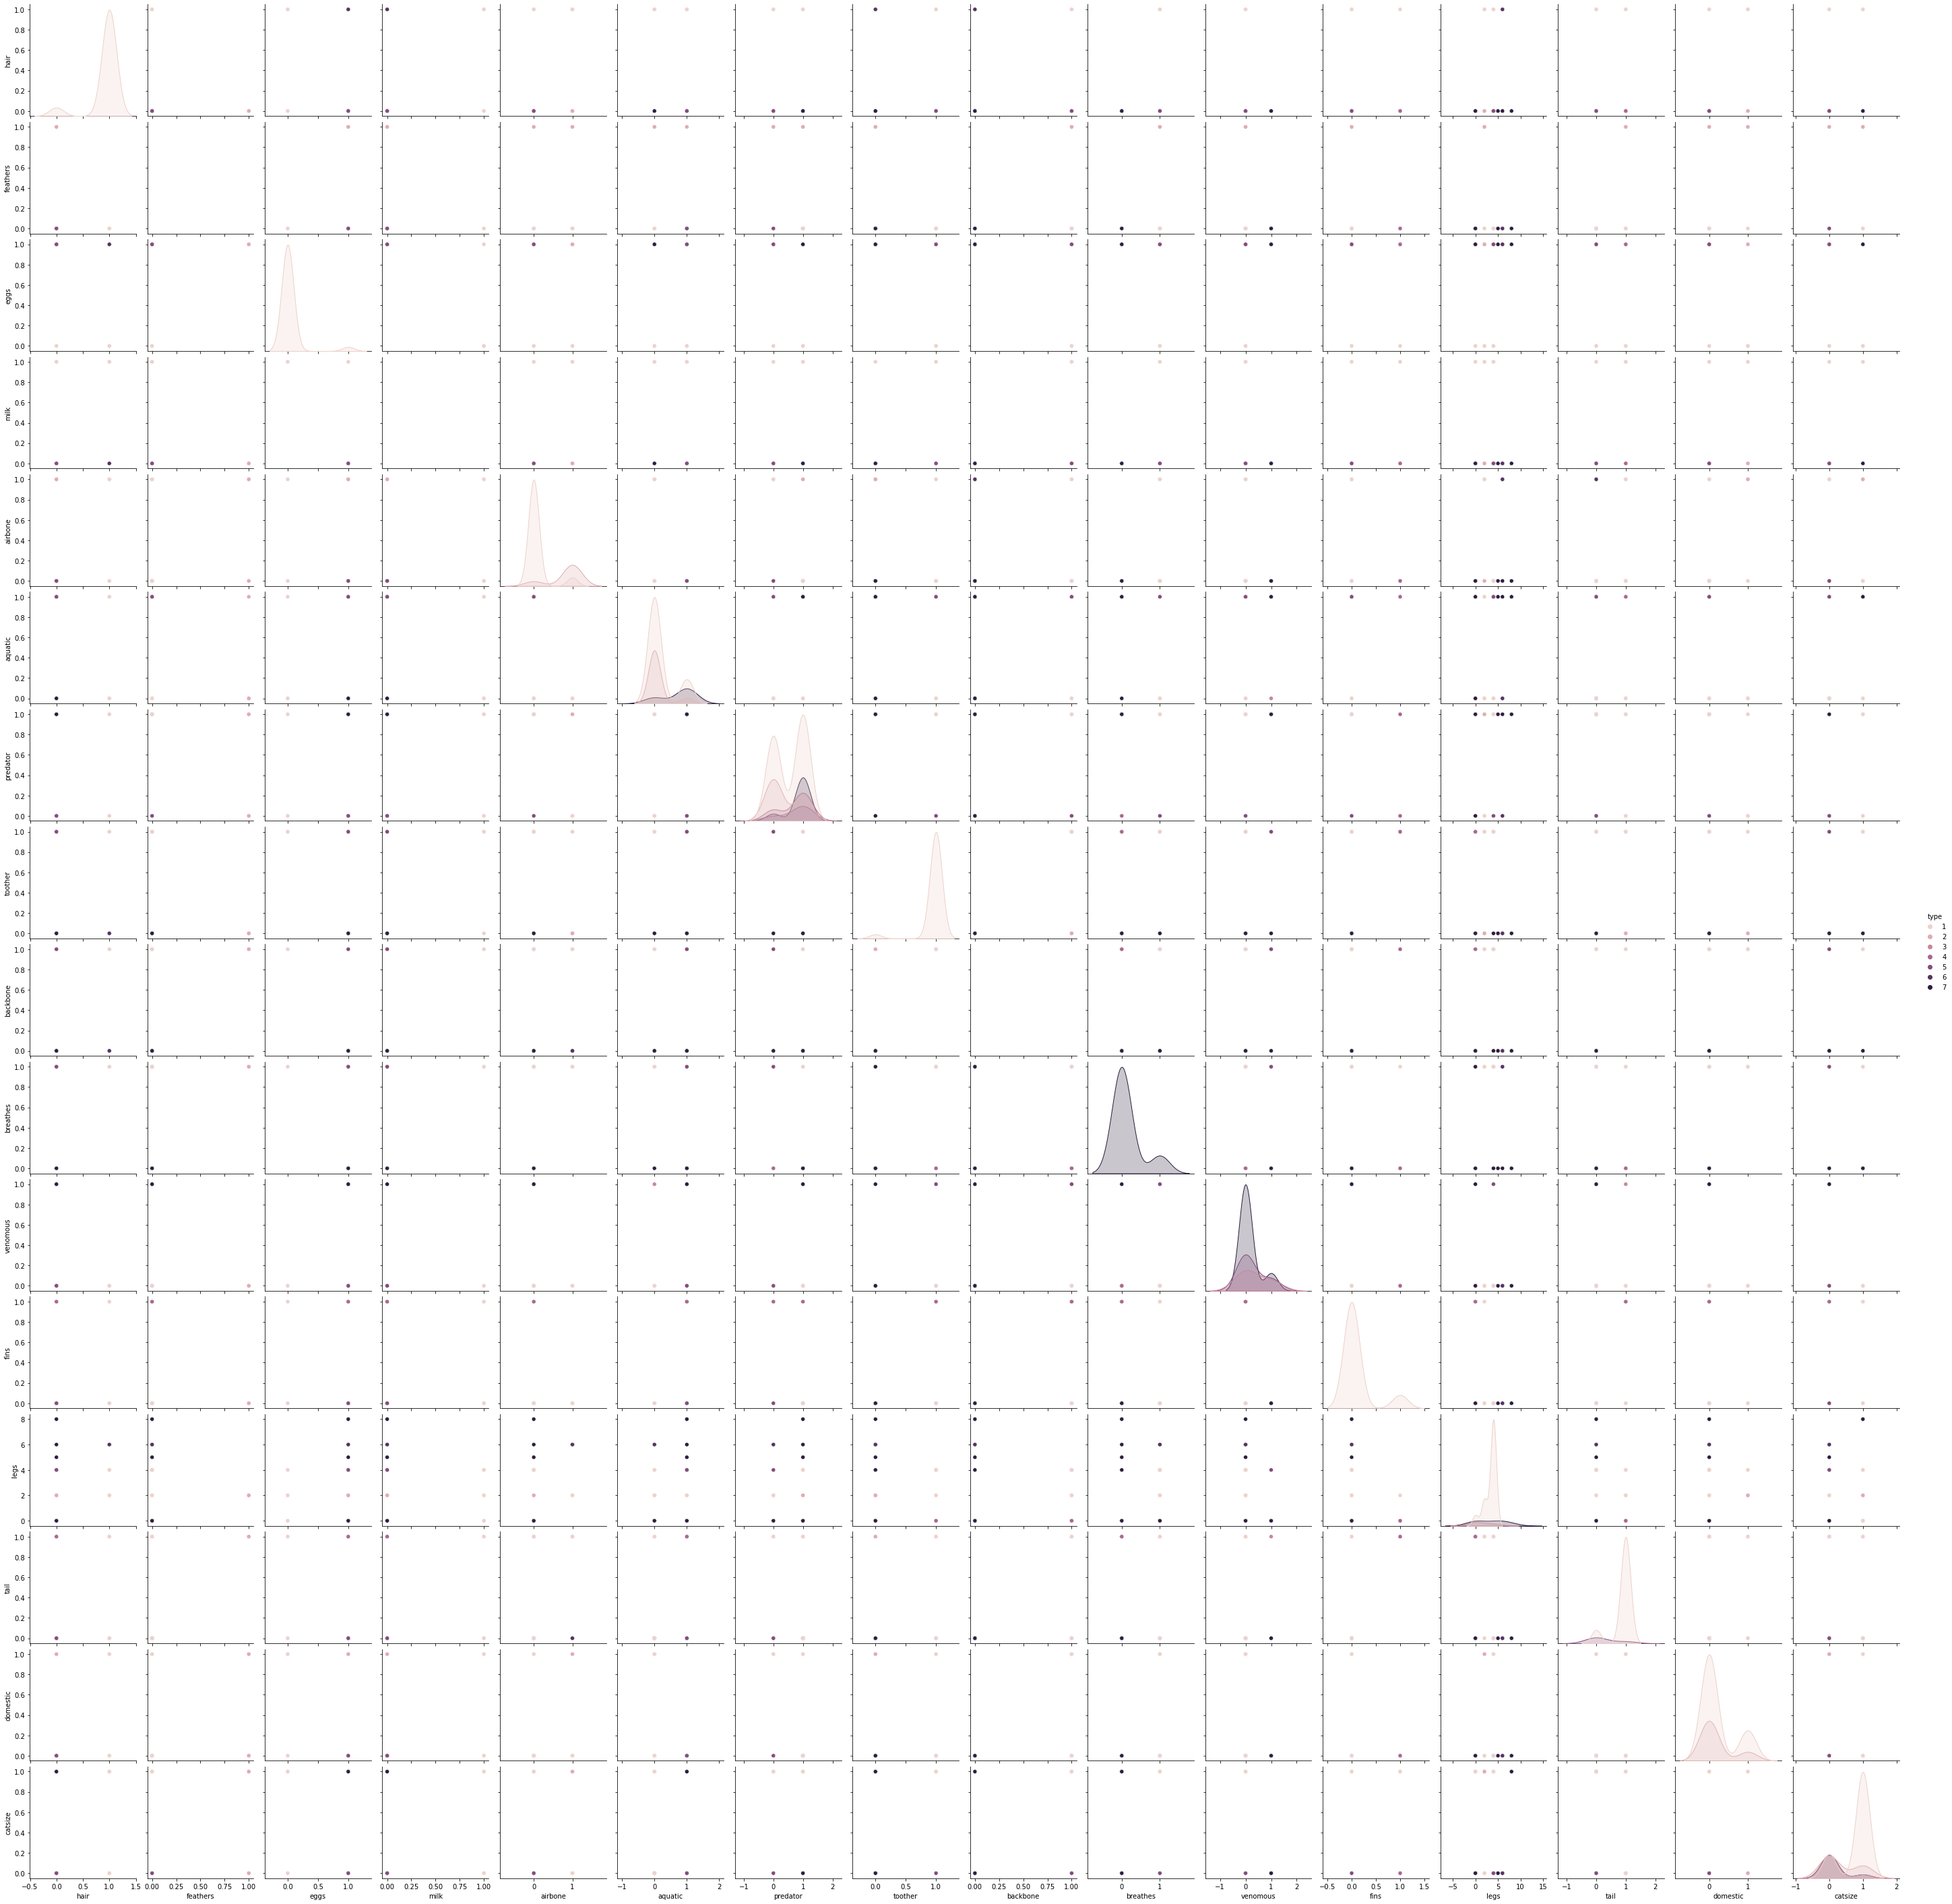

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data, hue=target_column_name)
plt.show()

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **gaussian_naive_bayes_algorithm** definida previamente en esta guía, pasando como parametros:
1. El conjunto de datos de entrenamiento
2. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
3. La el nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

In [9]:
# En la siguiente linea vamos a marcar los nombres de las variables independientes
x_columns = ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
y_column = 'type'
model, train_elapsed_time = gaussian_naive_bayes_algorithm(train_data, x_columns, y_column)

Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

In [10]:
start_time = datetime.datetime.now()

predictions = model.predict(test_data[x_columns])
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions

array([1, 1, 4, 2, 4, 2, 7, 1, 6, 1, 2, 1, 1, 6, 2, 7, 1, 1, 7, 1, 1, 4,
       4, 1, 2, 7, 4, 1, 4, 2, 2, 7, 4, 2, 7, 1, 1, 6, 1, 2], dtype=int64)

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [12]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [13]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_data[y_column])
algorithm_scores.loc[len(algorithm_scores)] = ['Naive Bayes', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [14]:
algorithm_scores

algorithm  mean_absolute_error  mean_squared_error  train_elapsed_time  \
0  Naive Bayes                 0.15                 0.2              11.001   

   test_elapsed_time  
0              9.002